In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
import pandas as pd

In [4]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
df = pd.read_csv('/content/gdrive/MyDrive/amazon_baby.csv')

In [12]:
df.head()

name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  
0  These flannel wipes are OK, but in my opinion ...       3  
1  it came early and was not disappointed. i love...       5  
2  Very soft and comfortable and warmer than it l...       5  
3  This is a product well worth the purchase.  I ...       5  
4  All of my kids have cried non-stop when I trie...       5

In [13]:
df['sentiment'] =  df['rating'].apply(lambda x: 0 if x in [1,2] else 1)

In [14]:
df.head()

name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  sentiment  
0  These flannel wipes are OK, but in my opinion ...       3          1  
1  it came early and was not disappointed. i love...       5          1  
2  Very soft and comfortable and warmer than it l...       5          1  
3  This is a product well worth the purchase.  I ...       5          1  
4  All of my kids have cried non-stop when I trie...       5          1

In [15]:
#remove the rating with 3
df_new = df[df['rating']!=3]

In [16]:
df_new.drop(['rating', 'name'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df_new

review  sentiment
1       it came early and was not disappointed. i love...          1
2       Very soft and comfortable and warmer than it l...          1
3       This is a product well worth the purchase.  I ...          1
4       All of my kids have cried non-stop when I trie...          1
5       When the Binky Fairy came to our house, we did...          1
...                                                   ...        ...
183526  Such a great idea! very handy to have and look...          1
183527  This product rocks!  It is a great blend of fu...          1
183528  This item looks great and cool for my kids.......          1
183529  I am extremely happy with this product. I have...          1
183530  I love this product very mush . I have bought ...          1

[166752 rows x 2 columns]

In [18]:
split = round(len(df_new)*0.8)
train_reviews = df_new['review'][:split]
train_label = df_new['sentiment'][:split]
test_reviews = df_new['review'][split:]
test_label = df_new['sentiment'][split:]

In [19]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [20]:
training_sentences

['it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.',
 'Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt',
 'This is a product well worth the purchase.  I have not found anything else like this, and it is a positive, ingenious approach to losing the binky.  What I love most about this product is how much ownership my daughter has in getting rid of the binky.  She is so proud of herself, and loves her little fairy.  I love the artwork, the chart in the back, and the clever approach of this tool.',
 "All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet.  It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from it.This is a must buy book, and a

In [32]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [33]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [34]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'it': 5,
 'to': 6,
 'a': 7,
 'is': 8,
 'this': 9,
 'for': 10,
 'my': 11,
 'of': 12,
 'in': 13,
 'that': 14,
 'with': 15,
 'on': 16,
 'was': 17,
 'have': 18,
 'we': 19,
 'but': 20,
 'so': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'as': 25,
 'one': 26,
 'baby': 27,
 'they': 28,
 'very': 29,
 'when': 30,
 'be': 31,
 'great': 32,
 'at': 33,
 'up': 34,
 'just': 35,
 'would': 36,
 'out': 37,
 'use': 38,
 'he': 39,
 'she': 40,
 'our': 41,
 'all': 42,
 'can': 43,
 "it's": 44,
 'had': 45,
 'these': 46,
 'them': 47,
 'like': 48,
 'her': 49,
 'if': 50,
 'or': 51,
 'love': 52,
 'has': 53,
 'seat': 54,
 'easy': 55,
 'little': 56,
 'old': 57,
 'get': 58,
 'well': 59,
 'from': 60,
 'only': 61,
 'will': 62,
 'because': 63,
 'also': 64,
 'more': 65,
 'product': 66,
 'time': 67,
 'really': 68,
 'about': 69,
 'bought': 70,
 'other': 71,
 'no': 72,
 'too': 73,
 'son': 74,
 'now': 75,
 'than': 76,
 'much': 77,
 'me': 78,
 'good': 79,
 'months': 80,
 'put': 81,
 "

In [35]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [40]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [42]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
4169/4169 [==============================] - 20s 4ms/step - loss: 0.3045 - accuracy: 0.8794 - val_loss: 0.1872 - val_accuracy: 0.9252
Epoch 2/20
4169/4169 [==============================] - 20s 5ms/step - loss: 0.1845 - accuracy: 0.9281 - val_loss: 0.1693 - val_accuracy: 0.9356
Epoch 3/20
4169/4169 [==============================] - 18s 4ms/step - loss: 0.1662 - accuracy: 0.9356 - val_loss: 0.1686 - val_accuracy: 0.9372
Epoch 4/20
4169/4169 [==============================] - 18s 4ms/step - loss: 0.1555 - accuracy: 0.9398 - val_loss: 0.1663 - val_accuracy: 0.9366
Epoch 5/20
4169/4169 [==============================] - 21s 5ms/step - loss: 0.1474 - accuracy: 0.9430 - val_loss: 0.1653 - val_accuracy: 0.9365
Epoch 6/20
4169/4169 [==============================] - 17s 4ms/step - loss: 0.1408 - accuracy: 0.9459 - val_loss: 0.1673 - val_accuracy: 0.9357
Epoch 7/20
4169/4169 [==============================] - 19s 4ms/step - loss: 0.1352 - accuracy: 0.9481 - val_loss: 0.1716 - val_ac

<Figure size 432x288 with 0 Axes>

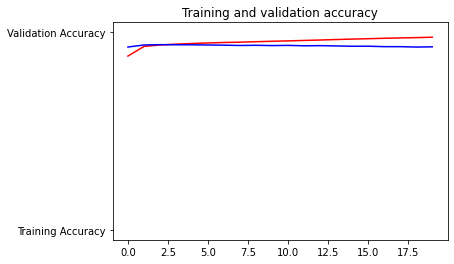

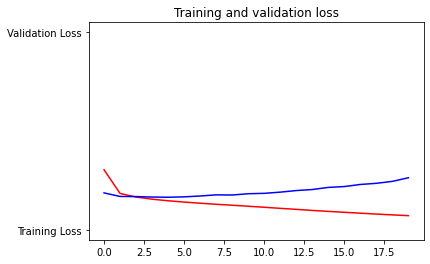

<Figure size 432x288 with 0 Axes>

In [43]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [47]:
#save the model in SavedModel format

tf.saved_model.save(model, '/content/gdrive/MyDrive/model/model')

In [56]:
 model = tf.saved_model.load('/content/gdrive/MyDrive/model/model')

In [58]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [42]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [69]:
check = ["I would not recommend.", "loved and recommend", "worst and bad."]
check2 = ["I would not recommend."]

In [ ]:
inference_sent = tokenizer.texts_to_sequences(check)

testing_padded = pad_sequences(inference_sent, maxlen=max_length)
testing_padded.tolist()

In [73]:
model(testing_padded.tolist())

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.47643477],
       [0.97497183],
       [0.03843811]], dtype=float32)>

In [25]:
import pickle
#save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
model
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)